### DATA PRE-PROCESSING

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from tqdm.notebook import tqdm
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Group_15_data_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label,Label-0/1
0,0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber,1.0
1,1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky,1.0
2,2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber,1.0
3,3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber,1.0
4,4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky,1.0


### CONSTRUCTING NEW FEATURES

#### 1. n_address_feature 
The feature contains the number of times the address has been seen in the training set (boxcox transformation applied)

In [4]:
dict_n_address = dict(df['address'].value_counts())

In [5]:
n_address = boxcox(np.array(list(dict_n_address.values())))[0]
n_address

array([0.04000284, 0.04000284, 0.04000284, ..., 0.        , 0.        ,
       0.        ])

We are updating the dictionary with number of times each address appears with the boxcox transformation applied to fix the skewness

In [6]:
for index, key in tqdm(enumerate(dict_n_address.keys())):
    updated = {key: n_address[index]}
    dict_n_address.update(updated)

0it [00:00, ?it/s]

In [9]:
pd.Series(list(dict_n_address.values())).value_counts()

0.000000    2534328
0.040003      54686
0.040003      17704
0.040003      16749
0.040003       7628
dtype: int64

We are getting a list of the new values, for each address in the training set we are appending its corresponding boxcox'd number of times its appeared in training set

In [7]:
n_address_feature = np.array([])

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    #We are getting a list of the new values
    #For each address in the training set we are appending its corresponding boxcox'd
    #number of times its appeared in training set

    n_address_i = dict_n_address.get(df.loc[index]['address']) 
    n_address_feature = np.append(n_address_feature, n_address_i)

  0%|          | 0/2916697 [00:00<?, ?it/s]

In [8]:
df['n_address'] = n_address_feature 

#### 2. quarter_number
Feature indicates which quarter of the year the day number belongs to

In [ ]:
def get_quarter(day):
    if day <= 91:
        #First 3 months, so we return quarter number = 1
        return 1
    elif day <= 91 * 2:
        #Next 3 months, quarter number = 2
        return 2
    elif day <= 91 * 3:
        #Next 3 months, quarter number = 3
        return 3
    else:
        #Last 4 months, quarter number = 4
        return 4

quarter_number_feature = np.array([])

day_t = df['day']

for day in tqdm(day_t):
    #For each day, we append its correspoding quarter number
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
    quarter_number_feature = np.append(quarter_number_feature, get_quarter(day))

  0%|          | 0/2916697 [00:00<?, ?it/s]

#### 3. day_of_the_week
Feature indicates the number of the weekday (for eg: 0 for Monday and 6 for Sunday). The hypothesis is that the day of the week might correlate with the nature of the transaction

* return day number (0 for monday, 6 for sunday) for day_i
* For each data-point, we consider its year and day and calculate what day of the week (Monday, Tuesday, etc) it was when the transaction happened

* datetime.datetime(year, 1, 1).weekday() returns the first day of the year in the year = year using this information, we can calculate the present day

In [ ]:
def get_day_number(first_day, day_i):
    return (first_day + day_i - 1) % 7

day_of_the_week = np.array([])


In [ ]:
day_of_week_train = np.array([])
for index, row in tqdm(df.iterrows(),total = df.shape[0]):
    year_i, day_i = row['year'], row['day']
    day_of_week_train = np.append(day_of_week_train, get_day_number(datetime.datetime(year_i, 1, 1).weekday(), day_i))

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
range(0,df.shape[0])

#### 4. guassian_length

* Feature tries to fix the skewness of the length variable. This is done by applying complex functions over the length feature and then performing a boxcox operation on it

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


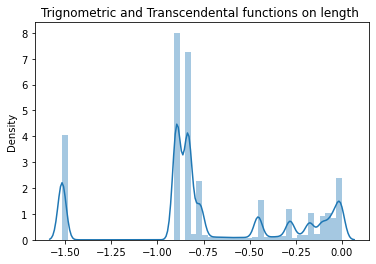

In [9]:
sns.distplot(boxcox((np.sin(np.log(np.sqrt(np.array(df['length']) + 1e-6)))) ** 2)[0])
plt.title('Trignometric and Transcendental functions on length ')
plt.show()

In [10]:
gaussian_length = boxcox((np.sin(np.log(np.sqrt(np.array(df['length']) + 1e-6)))) ** 2)[0]

#### 5. gaussian_weight
* Feature corrects for the skewedness in weight

In [11]:
gaussian_weight = np.array(boxcox(np.array(df['weight'],  dtype=np.longdouble))[0])

C:\Users\Sam\anaconda3\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


#### 6. log_count
* Performing log-transformation to fix skewedness

In [12]:
log_count = np.log(np.array(df['count']) + 1e-6)

#### 7. sigmoid_looped
* Performing sigmoid operation to fix skewedness

In [13]:
def sigmoid(x):
    #returns the logistic function of x
    
    return 1 / (1 + np.exp(-x))

In [14]:
sigmoid_looped = sigmoid(np.array(df['looped']))

#### 8. gaussian_neighbors¶
* Feature tries to account for the extreme skewedness of neighbors by applying boxcox transformation

In [15]:
gaussian_neighbors = boxcox(np.array(df['neighbors']) + 1e-6)[0]

#### 9. gaussian_income
* Feature tries to account for the extreme skewedness of income by applying boxcox transformation

In [16]:
gaussian_income = boxcox(np.array(df['income']) + 1e-6)[0]

#### 10. Interaction between length and weight
* If length and weight are greater than the median, we will return 0
* If just length is greater than the median we return 1
* return 2 if length is lesser than median

In [ ]:
median_length = np.median(df['length'])
median_weight = np.median(df['weight'])

def get_length_weight(length_i, weight_i):
    if length_i > median_length:
        if weight_i > median_weight:
            return 0
        else:
            return 1
    return 2

#Constructing the interaction feature for train

interaction_length_weight = np.array([])


In [ ]:
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    interaction_length_weight = np.append(interaction_length_weight, get_length_weight(row['length'], row['weight']))

#### 11. Interaction between log-count and gaussian-income
* Return 0 if both log_count and gaussian_income are greater than their medians
* return 1 if just log_count is greater than median
* return 2 if log count is lesser than median

In [17]:
median_count = np.median(log_count)
median_income = np.median(gaussian_income)

def get_count_income(log_count_i, gaussian_income_i):
    if log_count_i > median_count:
        if gaussian_income_i > median_income:
            return 0
        else:
            return 1
    return 2

#construct the interaction feature
    
interaction_count_income = np.array([])

In [19]:
for i in tqdm(range(len(log_count))):
    interaction_count_income = np.append(interaction_count_income, get_count_income(log_count[i], gaussian_income[i]))

  0%|          | 0/2916697 [00:00<?, ?it/s]

### LOADING ALL THE NEW FEATURES INTO THE DATA FRAME

In [20]:
#df['n_address'] = n_address_feature 
#df['day_of_week'] = day_of_week 
#df['quarter_number'] = quarter_number_feature 
df['gaussian_income'] = gaussian_income 
df['gaussian_neighbors'] = gaussian_neighbors 
df['gaussian_weight'] = gaussian_weight 
df['gaussian_length'] = gaussian_length 
df['log_count'] = log_count 
df['sigmoid_looped'] = sigmoid_looped 
df['interaction_count_income'] = interaction_count_income
#df['interaction_length_weight'] = interaction_length_weight 

In [21]:
df.drop(['label'], axis = 1)

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,Label-0/1,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income
0,0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,1.0,0.000000,4.117890,5.841922e-01,-3.193848,-0.015776,9.999995e-07,0.500000,2.0
1,1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,1.0,0.000000,4.117884,9.999992e-07,-4.281714,-0.103159,9.999995e-07,0.500000,2.0
2,2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,1.0,0.000000,4.125572,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.500000,2.0
3,3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,1.0,0.000000,4.113622,5.841922e-01,-3.489562,-0.321544,9.999995e-07,0.500000,2.0
4,4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,1.0,0.000000,4.125572,9.999992e-07,-2.082769,-0.835088,6.122493e+00,0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916692,2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,0.0,0.000000,4.140721,9.999992e-07,-1.810539,-0.895270,9.999995e-07,0.500000,2.0
2916693,2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,0.0,0.000000,4.106990,9.999992e-07,0.000000,-0.895270,9.999995e-07,0.500000,2.0
2916694,2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,0.0,0.040003,4.144653,1.644364e+00,3.143166,-1.517376,1.791760e+00,0.997527,0.0
2916695,2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,0.0,0.000000,4.124370,9.999992e-07,-0.651148,-0.895270,9.999995e-07,0.500000,2.0


In [22]:
df.to_csv("Group_15_cleaned_PreProcessed.csv")